In [2]:
#Color printing
from termcolor import colored

#General data operations library
import math
import numpy as np

#The tensorflow library
import tensorflow  as tf

#Plotting libraries
import matplotlib.pyplot as plt

#Increase plots font size
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (10, 7),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
plt.rcParams.update(params)

#############################################################################
#FUNKCJE Z ZAJĘĆ

def plotTrainHistory(history):

    fig, axes = plt.subplots(1,2, figsize=(7,3))
    axes[0].plot(history.history['loss'], label = 'train')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Loss function')
    axes[0].legend(loc='upper right')

    axes[1].plot(history.history['loss'], label = 'train')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss function')
    axes[1].legend(loc='upper right')
    axes[1].set_yscale('log')

    plt.subplots_adjust(bottom=0.02, left=0.02, right=0.98, wspace=0.6)
    plt.show()

def getFeatures(nPoints):
    return tf.random.uniform((nPoints,1), -10,10)

def getModel(nInputs, nHidenNeurons, nOutputNeurons, lr):
    inputs = tf.keras.Input(shape=(nInputs,), name="features")

    iLayer = 1
    layer = tf.keras.layers.Dense(nHidenNeurons,
                                  name="layer_{}".format(iLayer))(inputs)

    outputs = tf.keras.layers.Dense(nOutputNeurons, name = "output")(layer)

    model = tf.keras.Model(inputs=inputs, outputs=outputs, name="DNN")

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr),
                  loss=tf.keras.losses.MeanSquaredError(),
                  metrics=['MeanAbsolutePercentageError','RootMeanSquaredError'])
    return model
################################################################################
#Definicje problemu
nPoints = 1000
x = getFeatures(nPoints)
trinomial_coeff = np.array([-2,3,2])
y = trinomial_coeff[0] + trinomial_coeff[1]*x + trinomial_coeff[2]*x**2
x = np.hstack([x,x**2])

#definiowanie i trenowanie sieci; lr_schedule jak wcześniej na zajęciach
nInputs = 2
nHidenNeurons = 1
nOutputNeurons = 1
nEpochs = 100

initial_learning_rate = 1E-1
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate,
                decay_steps=200,
                decay_rate=0.95,
                staircase=True)


model = getModel(nInputs, nHidenNeurons, nOutputNeurons, lr_schedule)
history = model.fit(x=x, y=y, epochs=nEpochs, verbose=0)
metrics = model.evaluate(x=x, y=y)
y_pred = model.predict(x)
pass

32/32 [==============================] - 0s 4ms/step


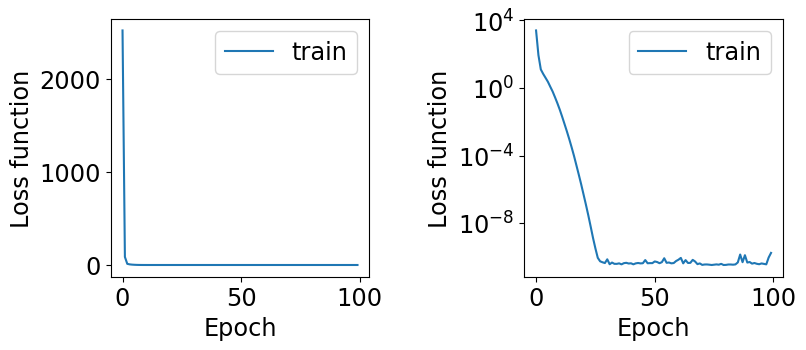

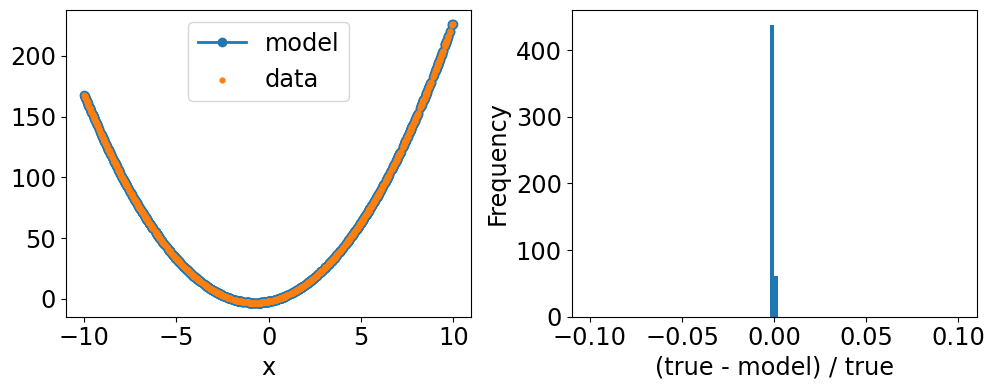

Współczynniki modelu (wagi sieci): [ 2.9999998  2.0000005 -2.0000002]
Współczynniki trójmianu: [-2  3  2]
Model: "DNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 features (InputLayer)       [(None, 2)]               0         
                                                                 
 layer_1 (Dense)             (None, 1)                 3         
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 5 (20.00 Byte)
Trainable params: 5 (20.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [3]:
################################################################################
#Rezultaty

finalWeight = (model.get_layer('layer_1').weights[0]*model.get_layer('output').weights[0]).numpy()[:,0]
l1_bias = model.get_layer('layer_1').weights[1].numpy()
output_weight = model.get_layer('output').weights[0].numpy()
output_bias = model.get_layer('output').weights[1].numpy()
total_bias = l1_bias*output_weight+output_bias
finalWeight = np.append(finalWeight,total_bias)

#Plot -- funkcja straty
plotTrainHistory(history)

#plot danych i efektu treningu
fig, axes = plt.subplots(1,2, figsize=(10,4))
arguments_plot = x[:,0]
ind=np.argsort(arguments_plot)

axes[0].plot(arguments_plot[ind],y_pred[ind],"o",ls='-',linewidth = 2,label="model", zorder=1)
axes[0].scatter(x[:,0],y,s=12,c="tab:orange",label="data", zorder=10)
axes[0].set_xlabel("x")
axes[0].legend()

#Reshaping i histogram
y = tf.reshape(y, [-1])
y_pred = tf.reshape(y_pred, [-1])
delta = (y - y_pred) / y
axes[1].hist(delta,bins=np.linspace(-0.1,0.1,101),density=True)
axes[1].set_xlabel("(true - model) / true")
axes[1].set_ylabel("Frequency")
plt.tight_layout()
plt.show()

# Wypisanie wag modelu
print("Współczynniki modelu (wagi sieci):", finalWeight)
print("Współczynniki trójmianu:", trinomial_coeff)
#Informacje o sieci
model.summary()
pass